## Support Vector Machine (SVM)

Firstly, let's run a machine learning algorithm to establish a baseline for comparison with other algorithms we will evaluate.

In [ ]:
!pip install librosa tensorflow matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

X_train = np.loadtxt("/content/drive/My Drive/DeepLearning/code/dataset/train_data.csv", delimiter=",")
X_test = np.loadtxt("/content/drive/My Drive/DeepLearning/code/dataset/test_data.csv", delimiter=",")
y_train = np.loadtxt("/content/drive/My Drive/DeepLearning/code/dataset/train_labels.csv", delimiter=",")
y_test = np.loadtxt("/content/drive/My Drive/DeepLearning/code/dataset/test_labels.csv", delimiter=",")
X_val = np.loadtxt("/content/drive/My Drive/DeepLearning/code/dataset/x_val.csv", delimiter=",")
y_val = np.loadtxt("/content/drive/My Drive/DeepLearning/code/dataset/y_val.csv", delimiter=",")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import f1_score, classification_report, accuracy_score


# Check the shapes of the data
print("Shapes before reshaping:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

# Ensure labels are 1D
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train = np.argmax(y_train, axis=1)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)
if len(y_val.shape) > 1 and y_val.shape[1] > 1:
    y_val = np.argmax(y_val, axis=1)

print("Shapes after reshaping:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Train the SVM model
clf = svm.SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

# Predict on the test set
predictions = clf.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print('F1 Score: {:.2f}'.format(f1))

# Print the classification report for detailed evaluation
print(classification_report(y_test, predictions))

# Print the accuracy score for comparison
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: {:.2f}%'.format(100 * accuracy))


Shapes before reshaping:
X_train shape: (2794, 76)
y_train shape: (2794, 2)
X_test shape: (350, 76)
y_test shape: (350, 2)
X_val shape: (349, 76)
y_val shape: (349, 2)
Shapes after reshaping:
X_train shape: (2794, 76)
y_train shape: (2794,)
X_test shape: (350, 76)
y_test shape: (350,)
X_val shape: (349, 76)
y_val shape: (349,)
F1 Score: 0.56
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       252
           1       0.76      0.45      0.56        98

    accuracy                           0.81       350
   macro avg       0.79      0.70      0.72       350
weighted avg       0.80      0.81      0.79       350

Accuracy: 80.57%


Class 0 (Non-Scream) has significantly better performance compared to Class 1 (Scream). This is typical for imbalanced datasets where the classifier tends to perform better on the majority class.

F1 Score: 0.56
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       252
           1       0.76      0.45      0.56        98

    accuracy                           0.81       350
   macro avg       0.79      0.70      0.72       350
weighted avg       0.80      0.81      0.79       350

Accuracy: 80.57%


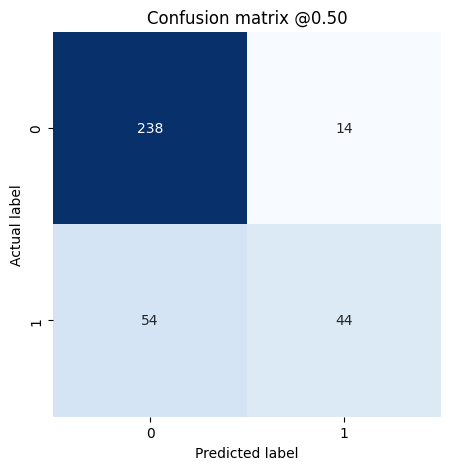

In [ ]:
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate F1 score
f1 = f1_score(y_test, predictions)
print('F1 Score: {:.2f}'.format(f1))

# Print the classification report for detailed evaluation
print(classification_report(y_test, predictions))

# Print the accuracy score for comparison
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: {:.2f}%'.format(100 * accuracy))

# Function to plot confusion matrix
def plot_cm(labels, predictions, threshold=0.5):
    predictions = predictions > threshold
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title('Confusion matrix @{:.2f}'.format(threshold))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# Call the function to plot the confusion matrix
plot_cm(y_test, predictions)


The initial SVM results on the imbalanced dataset provide a baseline for comparison with deep learning models. The accuracy is 80.57%, but this high value is misleading due to the class imbalance. The overall F1 score is 0.56, indicating the model struggles with precision and recall, especially for the minority class (screaming). For non-screaming audio, the model performs well with an F1 score of 0.88, but for screaming audio, the F1 score drops to 0.56 due to low recall (0.45). It is important to mention that in our Human Scream Detection project, specifically for surveillance, the number of False Positives (FP) plays a crucial role. A False Positive means that the recorded audio contains a scream, but the algorithm fails to recognize it. In real life, this would be a significant error, indicating that the system is not functioning effectively. These results highlight the need for data augmentation and advanced models to better detect screaming samples and address class imbalance.